In [ ]:
import numpy as np
import tensorflow
import warnings
warnings.filterwarnings('ignore')
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten
test_labels =  [0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,
               1,1,1,1,1,1,1,1,1,1,
               1,1,1,1,1,1,1,1,1,1,
               1,1,1,1,1,1,1,1,1,1,
               1,1,1,1,1,1,1,1,1,1,
               1,1,1,1,1,1,1,1,1,1
               ]

In [ ]:
!unzip immaginiRitagliate.zip

In [ ]:
path='immaginiRitagliate'
images=[]

imgDimension=(32,32,3)


#########################################

myList=os.listdir(path)

numOfClasses=len(myList)
for x in range(0, numOfClasses):
	myPicList=os.listdir(path+"/"+str(x))
	# myData/0/img.jpg
	for y in myPicList:
		curImg=cv2.imread(path+"/"+str(x)+"/"+y)
		curImg=cv2.resize(curImg,(imgDimension[0],imgDimension[1]))
		images.append(curImg)
	print(x)
#immagini convertite in un array numpy
images=np.array(images)
print(len(images))


0
1
100


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('MyTrainingModel_1.h5')
model.summary()



In [ ]:
def preprocessing(img):
	# img=np.astype("uint8")
	img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	img=cv2.equalizeHist(img)
	img=img/255
	return img

x_test=np.array(list(map(preprocessing, images))) #Effettua il "preprocessing" di ogni immagine all'interno di x_test
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)

print(x_test.shape[0])
print(x_test.shape[1])
print(x_test.shape[2])
print(x_test.shape)




100
32
32
(100, 32, 32, 1)


In [ ]:


y_test=to_categorical(test_labels, numOfClasses)

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)


4/4 - 1s - loss: 3.5720 - accuracy: 0.7200


In [ ]:
pred = []
for x in range(100):

  img=x_test[x].reshape(1, 32, 32, 1)
  prediction=model.predict(img)
  probabilityValue=np.amax(prediction)
  max_index_row = np.argmax(prediction, axis=1)
  pred.append(max_index_row)



In [ ]:
print(pred)

[array([1]), array([1]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([0]), array([1]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([0]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), arr

In [ ]:
TP = 0
TN = 0
FP = 0
FN = 0

for x in range(100):
  if pred[x] == test_labels[x]:
    if pred[x] == 0:
      TP = TP + 1
    else:
      TN = TN + 1
  elif pred[x] == 0 and test_labels[x] == 1:
      FP = FP + 1
  else:
      FN = FN + 1

print(TP,FP,TN,FN)

28
44
28 6 44 22


In [ ]:
# PARAMETRI PRESTAZIONALI
sensitivity = TP/(TP + FN)
precision = TP/(TP + FP)
accuracy = (TP + TN)/(TP+FP+TN+FN)
specificity = TN/(TN + FP)

print('La precisione è: ', precision)
print('La sensitività è: ' , sensitivity)
print('La accuratezza è: ' , accuracy)
print('La specificità è: ', specificity)


La precisione è:  0.8235294117647058
La sensitività è:  0.56
La accuratezza è:  0.72
La specificità è:  0.88


Text(0.5, 29.5, 'Predicted label')

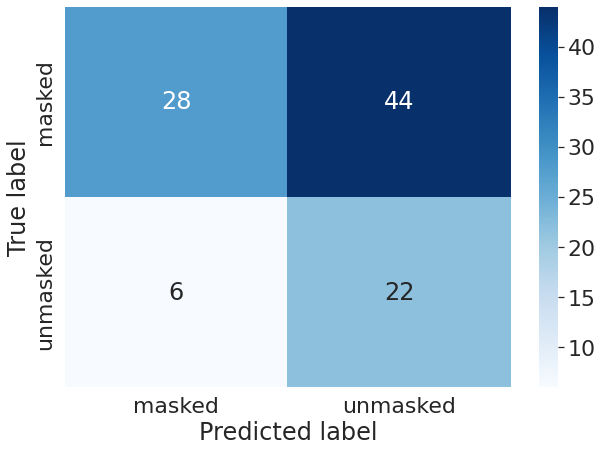

In [ ]:
# GENERAZIONE MATRICE DI CONFUSIONE
# Se l'algoritmo ha fatto una predizione in una zona dove non c'era nulla allora questa verrà considerata nell'ultima colonna della matrice (in corrispondenza della riga di una data classe (masked/unmasked)
# Se l'algoritmo non riconosce una zona di interesse dove invece è presente l'oggetto di interesse questa verrà considerata nell'ultima riga (in corrispondenza della colonna di una data classe)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[TP,TN],[FP,FN]]
df_cm = pd.DataFrame(array, index = ["masked","unmasked"],
                  columns = ["masked","unmasked"])
plt.figure(figsize = (10,7))

sn.set(font_scale=2)

sn.heatmap(df_cm, annot=True,cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')